In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Testing data shape: (10000, 28, 28), Testing labels shape: (10000,)


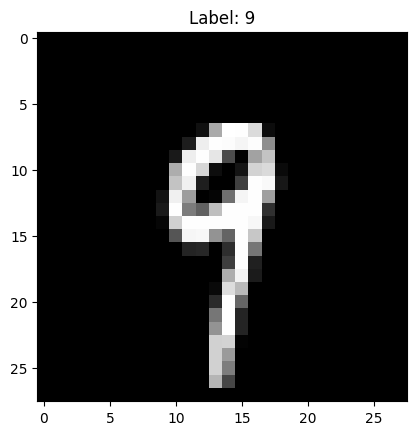

In [2]:
# Load the MNIST dataset from TensorFlow
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display the shape of the dataset
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}")

# Visualize a sample image
plt.imshow(X_train[600], cmap='gray')
plt.title(f"Label: {y_train[600]}")
plt.show()

In [3]:
# Normalize the data (scale pixel values to be between 0 and 1)
X_train = keras.utils.normalize(X_train, axis= 1)
X_test = keras.utils.normalize(X_test, axis= 1)

# Reshape data to add a channel dimension (for compatibility with CNN)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [4]:
# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, validation_split=0.1)

C:\Users\nicol\projects\mnist-digit-recognition\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8786 - loss: 0.4029 - val_accuracy: 0.9812 - val_loss: 0.0635
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9804 - loss: 0.0645 - val_accuracy: 0.9827 - val_loss: 0.0533
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9857 - loss: 0.0453 - val_accuracy: 0.9860 - val_loss: 0.0500
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9913 - loss: 0.0286 - val_accuracy: 0.9875 - val_loss: 0.0443
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9927 - loss: 0.0220 - val_accuracy: 0.9890 - val_loss: 0.0383
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9954 - loss: 0.0158 - val_accuracy: 0.9907 - val_loss: 0.0359
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9961 - loss: 0.0126 - val_accuracy: 0.9868 - val_loss: 0.0477
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9965 - loss: 0.0107 - 

In [5]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9882 - loss: 0.1071
Test accuracy: 0.99


In [6]:
# Save the model using the recommended Keras format
model.save('mnist_model.keras')